In [1]:
# Imports
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F


from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset, TensorDataset

from torchsummary import summary
import torchvision as tv
import torchvision.transforms as T
import copy

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline as backend_inline

backend_inline.set_matplotlib_formats("svg")


#### Pytorch device specific configuration ###

# Pytorch Gpu Configuration for Cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Pytorch Gpu Configuration for directml(AMD GPU)
# import torch_directml

# device = torch_directml.device()

# Set default device
torch.set_default_device(device)

In [4]:
# transformations
transform = T.Compose([T.ToTensor(), T.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

# import the data and simultaneously apply the transform
trainset = tv.datasets.CIFAR10(
    root="../Datasets/", train=True, download=True, transform=transform
)
testset = tv.datasets.CIFAR10(
    root="../Datasets/", train=False, download=True, transform=transform
)

# transform to dataloaders
batchsize = 32
train_loaderFull = DataLoader(
    trainset, batch_size=batchsize, shuffle=True, drop_last=True, generator=torch.Generator(device=device)
)
test_loaderFull = DataLoader(
    testset, batch_size=256, generator=torch.Generator(device=device)
)

# Create smaller DataLoaders with only 2k images (used later)

trainsetSmall = torch.utils.data.Subset(trainset, range(2000))
train_loaderSmall = DataLoader(
    trainsetSmall,
    batch_size=batchsize,
    shuffle=True,
    generator=torch.Generator(device=device),
)

testsetSmall = torch.utils.data.Subset(testset, range(2000))
test_loaderSmall = DataLoader(
    testsetSmall,
    batch_size=batchsize,
    shuffle=True,
    generator=torch.Generator(device=device),
)

Files already downloaded and verified
Files already downloaded and verified


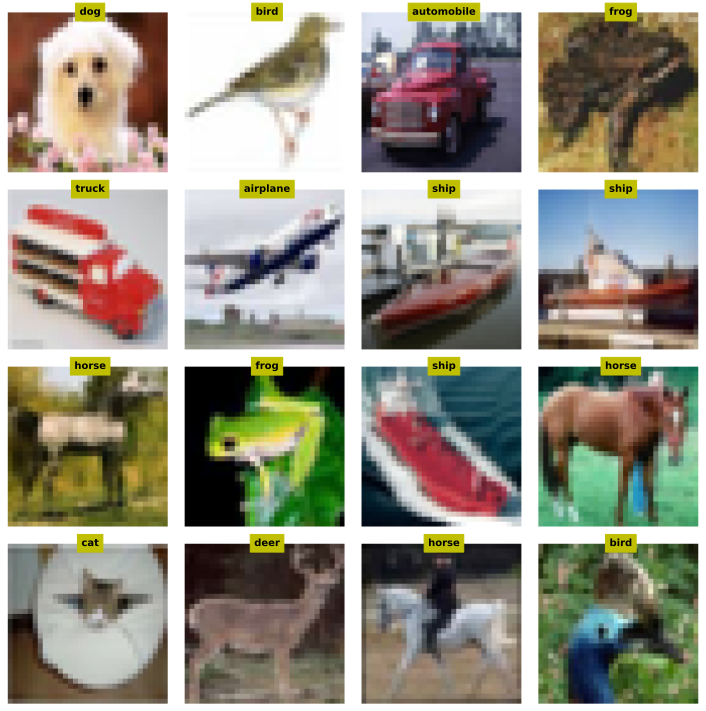

In [5]:
# inspect a few random images

X, y = next(iter(train_loaderSmall))

fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):

    # extract that image (need to transpose it back to 32x32x3)
    pic = X.data[i].numpy().transpose((1, 2, 0))
    pic = pic / 2 + 0.5  # undo normalization

    # and its label
    label = trainset.classes[y[i]]

    # and show!
    ax.imshow(pic)
    ax.text(
        16, 0, label, ha="center", fontweight="bold", color="k", backgroundcolor="y"
    )
    ax.axis("off")

plt.tight_layout()
plt.show()